 <h1><center>Coffee contains more caffeine than an Energy Drink</center></h1>

# Data Gathering

### Scrapped from [https://www.caffeineinformer.com/the-caffeine-database](https://www.caffeineinformer.com/the-caffeine-database) and stored the data in drinks_data.csv

In [1]:
library(tidyverse)
df <- read.csv('drinks_data.csv')
head(df)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,drink_name,volume_floz,calories,caffeine_mg,caffeine_mg.floz,drink_type
,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,28 Black Energy Drink,8.46,125,80,9.5,Energy Drink
2,3 Water,16.90,0,50,3.0,Water
3,3D Energy Drink,16.00,15,200,12.5,Energy Drink
4,4 Purpose Energy Drink,8.46,70,70,8.3,Energy Drink
5,4C Energy Drink Mix,16.90,15,170,10.1,Energy Drink
6,5 Hour Energy,1.93,4,200,103.6,Energy Shots


# Data Cleaning

In [2]:
# calculating calories per floz
df$calories_per_floz <- df$calories / df$volume_floz
head(df)

,drink_name,volume_floz,calories,caffeine_mg,caffeine_mg.floz,drink_type,calories_per_floz
,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>
1,28 Black Energy Drink,8.46,125,80,9.5,Energy Drink,14.775414
2,3 Water,16.90,0,50,3.0,Water,0.000000
3,3D Energy Drink,16.00,15,200,12.5,Energy Drink,0.937500
4,4 Purpose Energy Drink,8.46,70,70,8.3,Energy Drink,8.274232
5,4C Energy Drink Mix,16.90,15,170,10.1,Energy Drink,0.887574
6,5 Hour Energy,1.93,4,200,103.6,Energy Shots,2.072539


In [3]:
# checking the dimensions of the dataframe
dim(df)

[1] 632   7

In [4]:
# checking the column names
colnames(df)

[1] "drink_name"        "volume_floz"       "calories"         
[4] "caffeine_mg"       "caffeine_mg.floz"  "drink_type"       
[7] "calories_per_floz"

In [5]:
# renaming caffeine_mg.floz for consistency
colnames(df)[colnames(df) == 'caffeine_mg.floz'] <- 'caffeine_mg_per_floz'

In [6]:
# checking for null values in each column
colSums(is.na(df))

drink_name          volume_floz             calories 
                   0                    0                    0 
         caffeine_mg caffeine_mg_per_floz           drink_type 
                   0                    0                    0 
   calories_per_floz 
                   0

In [7]:
summary(df)

  drink_name         volume_floz       calories    caffeine_mg    
 Length:632         Min.   : 0.14   Min.   :  0   Min.   :   0.0  
 Class :character   1st Qu.: 8.00   1st Qu.:  0   1st Qu.:  50.0  
 Mode  :character   Median :12.00   Median : 25   Median : 100.0  
                    Mean   :11.80   Mean   : 75   Mean   : 134.2  
                    3rd Qu.:16.00   3rd Qu.:140   3rd Qu.: 160.0  
                    Max.   :48.00   Max.   :830   Max.   :1555.0  
 caffeine_mg_per_floz  drink_type        calories_per_floz
 Min.   :  0.00       Length:632         Min.   : 0.000   
 1st Qu.:  4.50       Class :character   1st Qu.: 0.000   
 Median :  9.50       Mode  :character   Median : 2.078   
 Mean   : 18.39                          Mean   : 6.516   
 3rd Qu.: 14.28                          3rd Qu.:12.500   
 Max.   :714.30                          Max.   :83.333   

In [8]:
# dropping unnecessary columns
df <- df %>% select(-calories, - caffeine_mg, -volume_floz)
head(df)

,drink_name,caffeine_mg_per_floz,drink_type,calories_per_floz
,<chr>,<dbl>,<chr>,<dbl>
1,28 Black Energy Drink,9.5,Energy Drink,14.775414
2,3 Water,3.0,Water,0.000000
3,3D Energy Drink,12.5,Energy Drink,0.937500
4,4 Purpose Energy Drink,8.3,Energy Drink,8.274232
5,4C Energy Drink Mix,10.1,Energy Drink,0.887574
6,5 Hour Energy,103.6,Energy Shots,2.072539


In [9]:
write.csv(df, "normalized_drinks_data.csv", row.names = FALSE)

dataset is ready for further analysis

# EDA

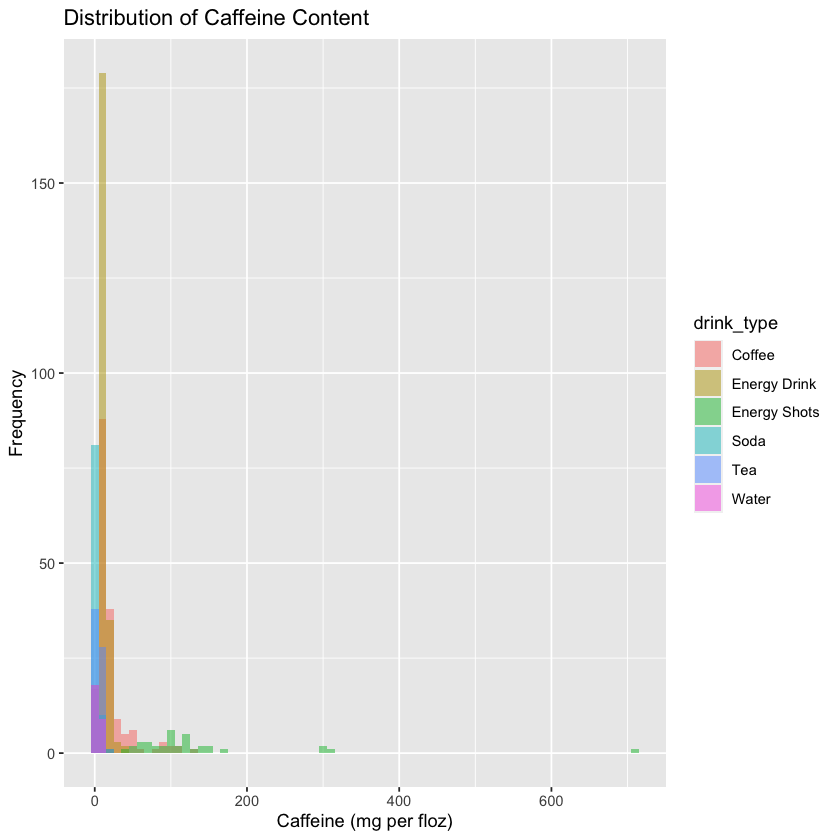

In [10]:
ggplot(df, aes(x = caffeine_mg_per_floz, fill = drink_type)) +
  geom_histogram(binwidth = 10, position = "identity", alpha = 0.5) +
  labs(title = "Distribution of Caffeine Content",
       x = "Caffeine (mg per floz)",
       y = "Frequency")

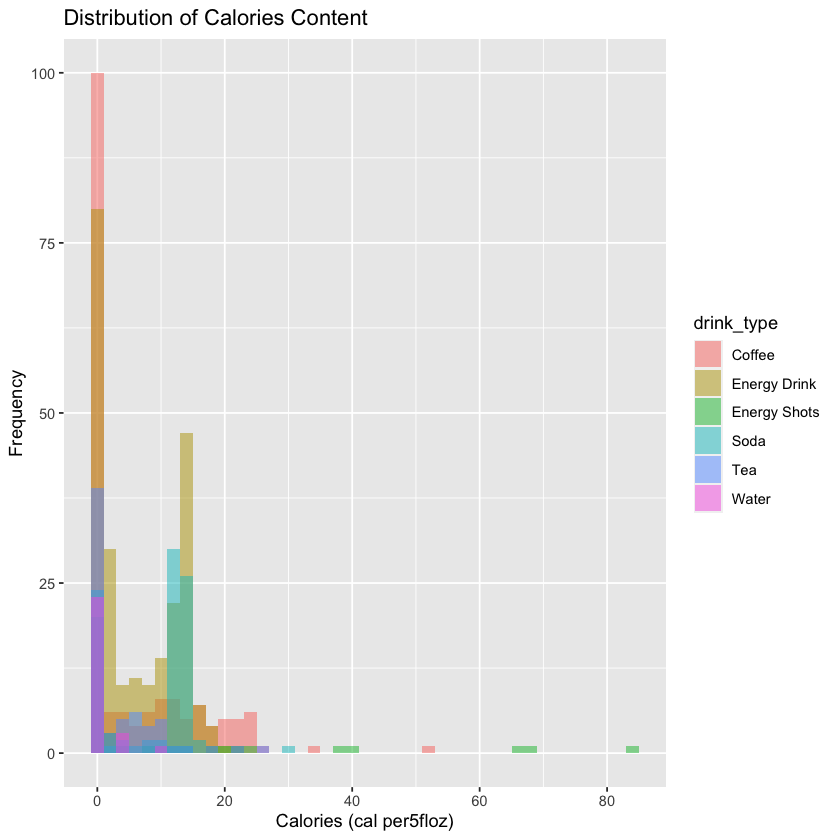

In [11]:
ggplot(df, aes(x = calories_per_floz, fill = drink_type)) +
  geom_histogram(binwidth = 2, position = "identity", alpha = 0.5) +
  labs(title = "Distribution of Calories Content",
       x = "Calories (cal per5floz)",
       y = "Frequency")

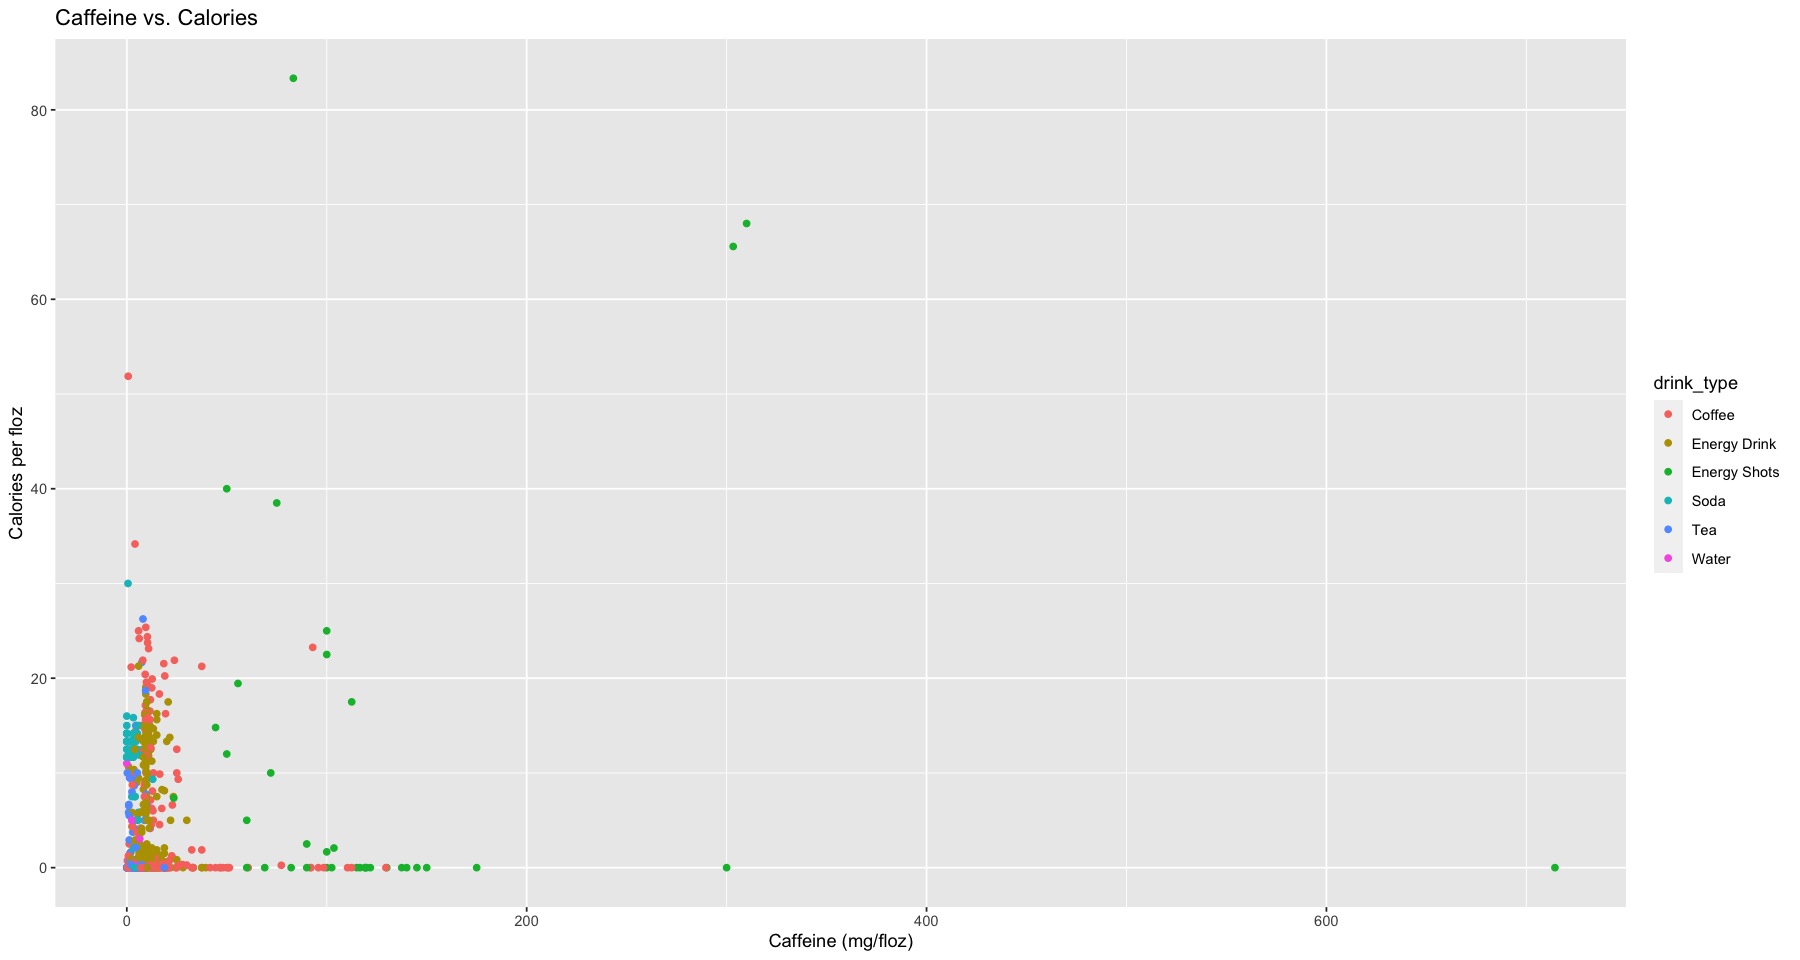

In [12]:
# 1. Scatter plot - Caffeine vs. Calories
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(df, aes(x = caffeine_mg_per_floz, y = calories_per_floz, color = drink_type)) +
  geom_point() +
  labs(title = "Caffeine vs. Calories",
       x = "Caffeine (mg/floz)", y = "Calories per floz")

In [13]:
correlation <- cor(df$calories_per_floz, df$caffeine_mg_per_floz)
cat("Correlation between calories and caffeine:", correlation)

Correlation between calories and caffeine: 0.08885294

#### There is no significant linear relationship between calories and caffeine

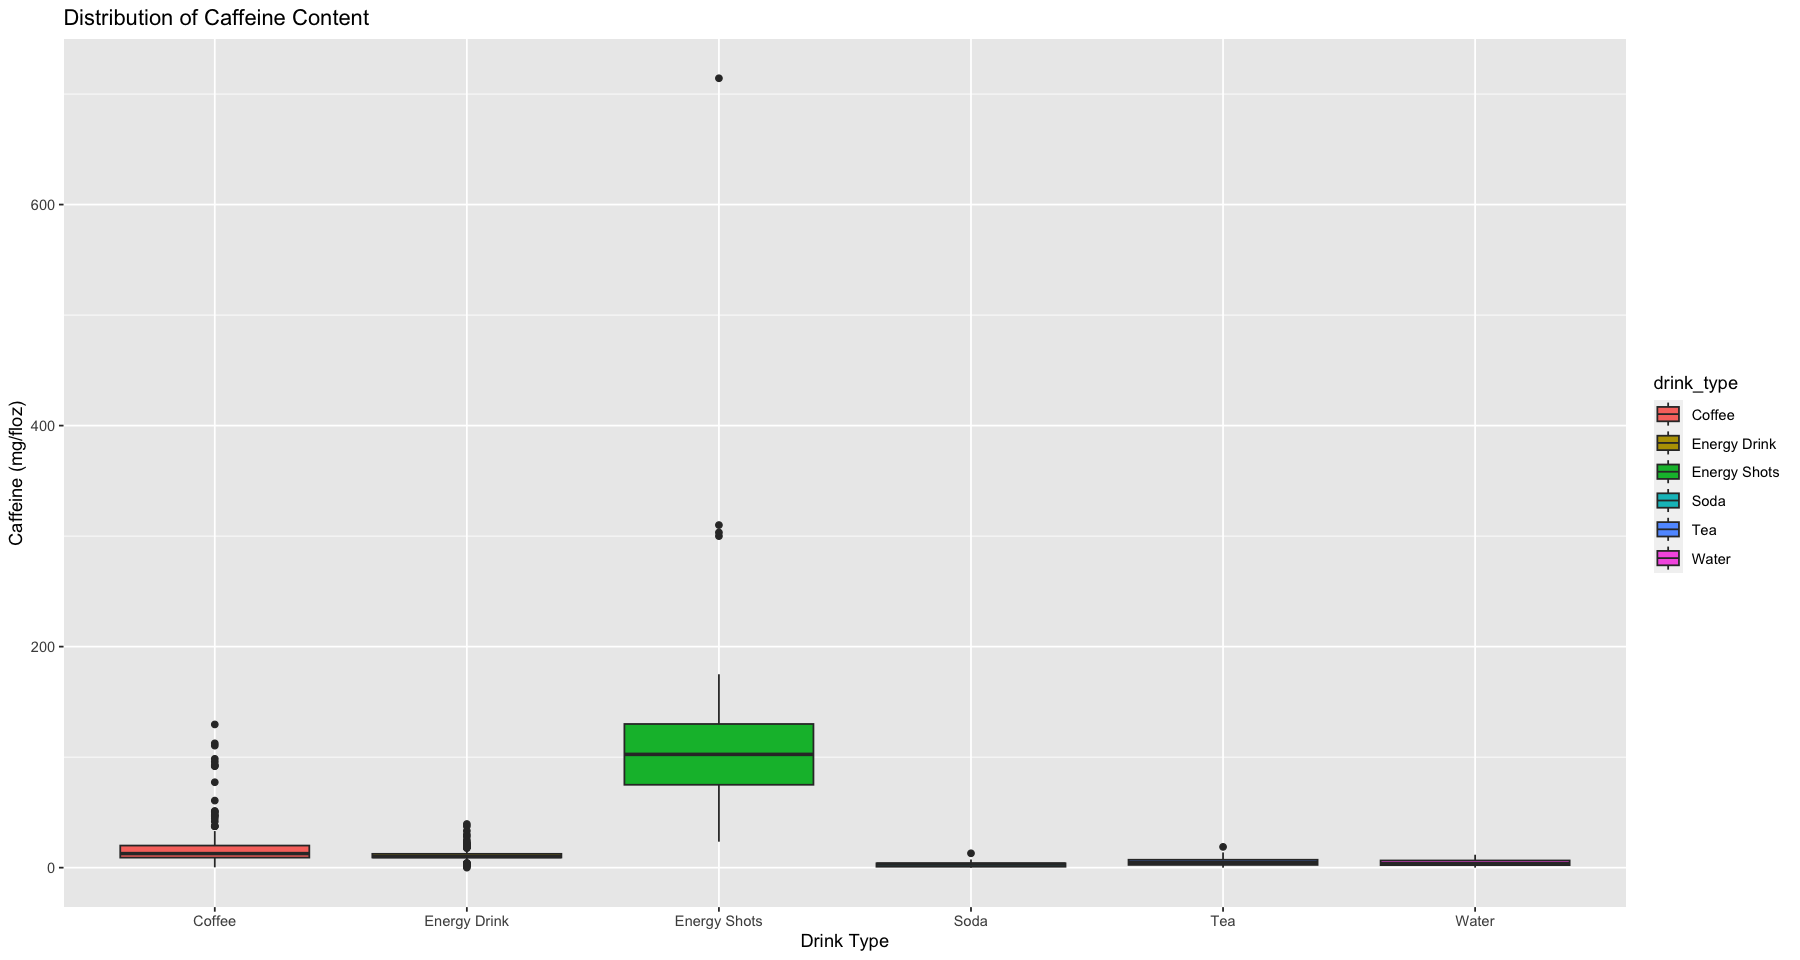

In [14]:
# 2. Box plot - Distribution of Caffeine content
ggplot(df, aes(x = drink_type, y = caffeine_mg_per_floz, fill = drink_type)) +
  geom_boxplot() +
  labs(title = "Distribution of Caffeine Content",
       x = "Drink Type", y = "Caffeine (mg/floz)")

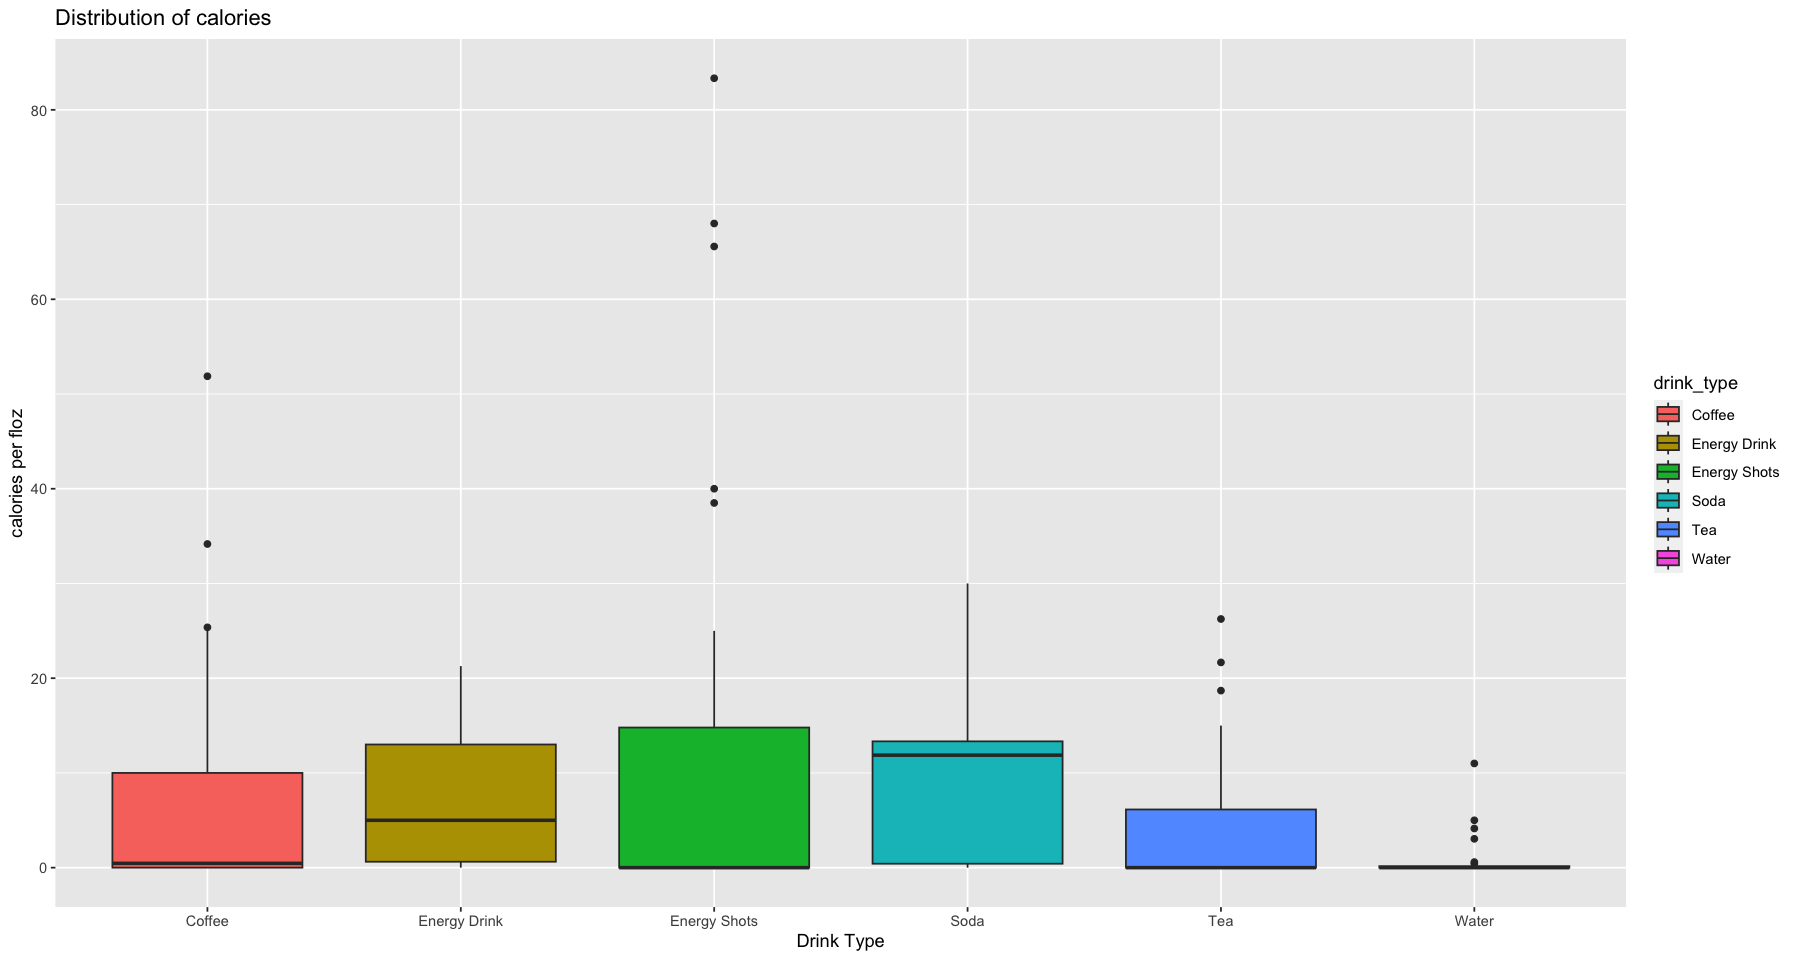

In [15]:
# 3. Box plot - Distribution of calories
ggplot(df, aes(x = drink_type, y = calories_per_floz, fill = drink_type)) +
  geom_boxplot() +
  labs(title = "Distribution of calories",
       x = "Drink Type", y = "calories per floz")

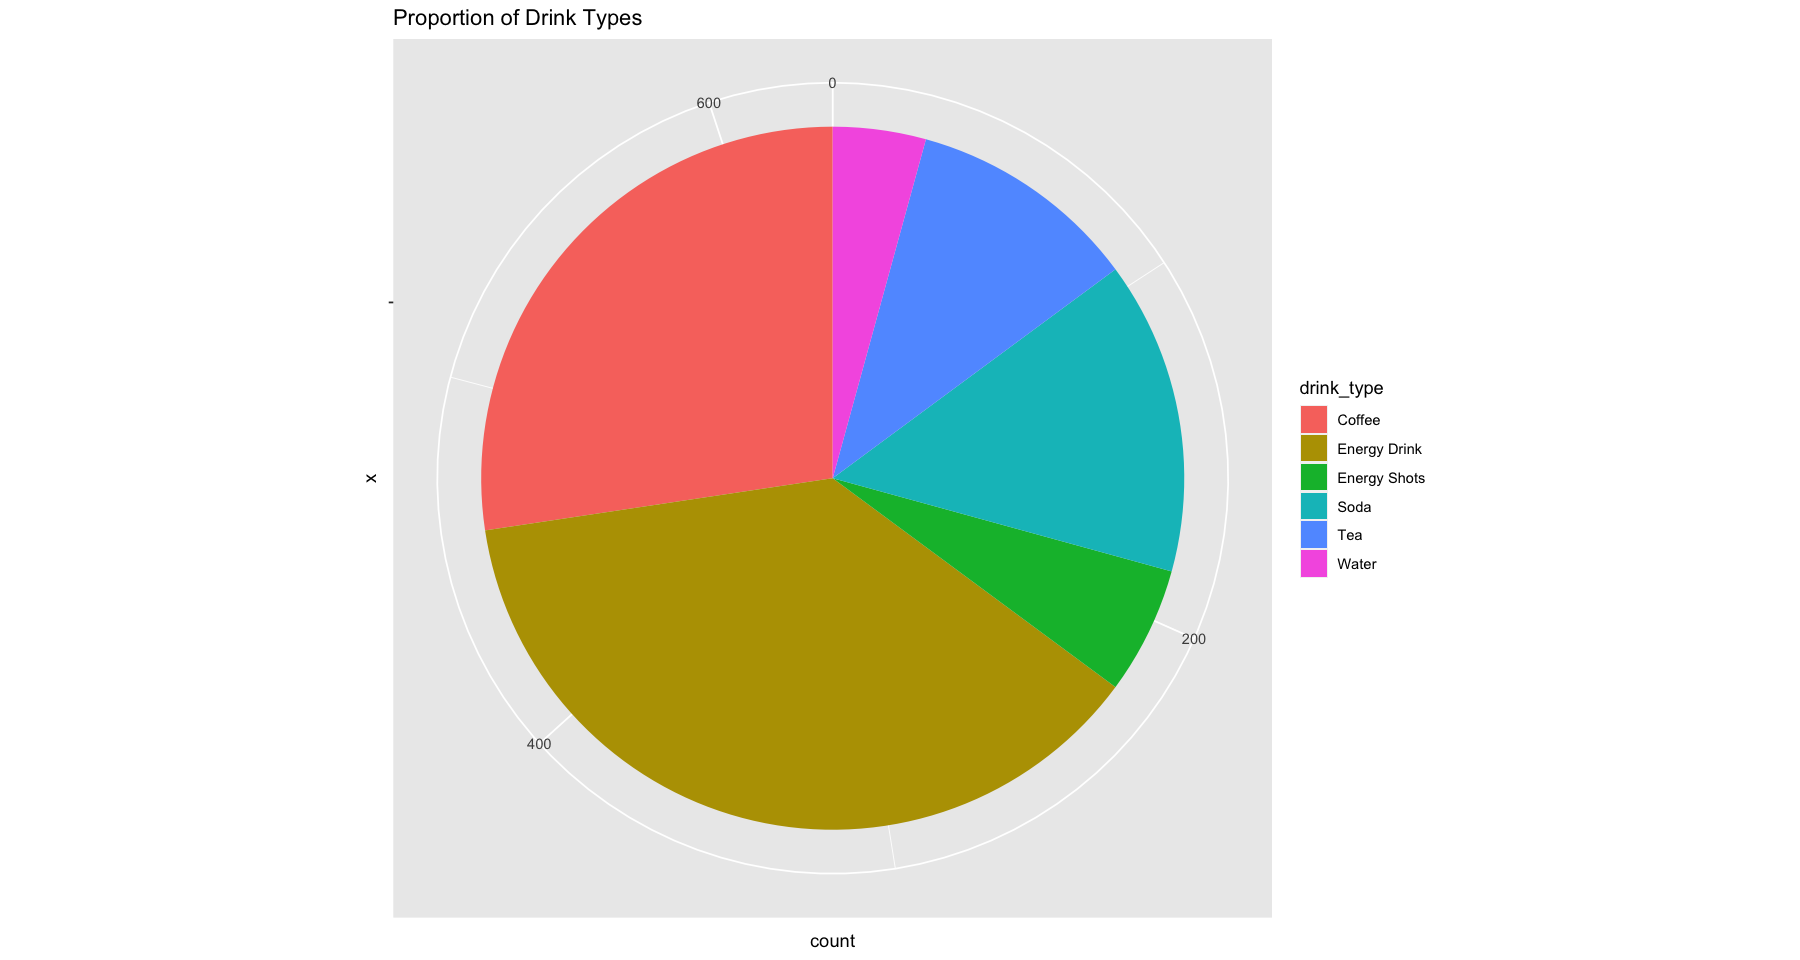

In [16]:
# 4. Pie chart - Proportion of Drink Types
ggplot(df, aes(x = "", fill = drink_type)) +
  geom_bar(width = 1) +
  coord_polar("y") +
  labs(title = "Proportion of Drink Types")

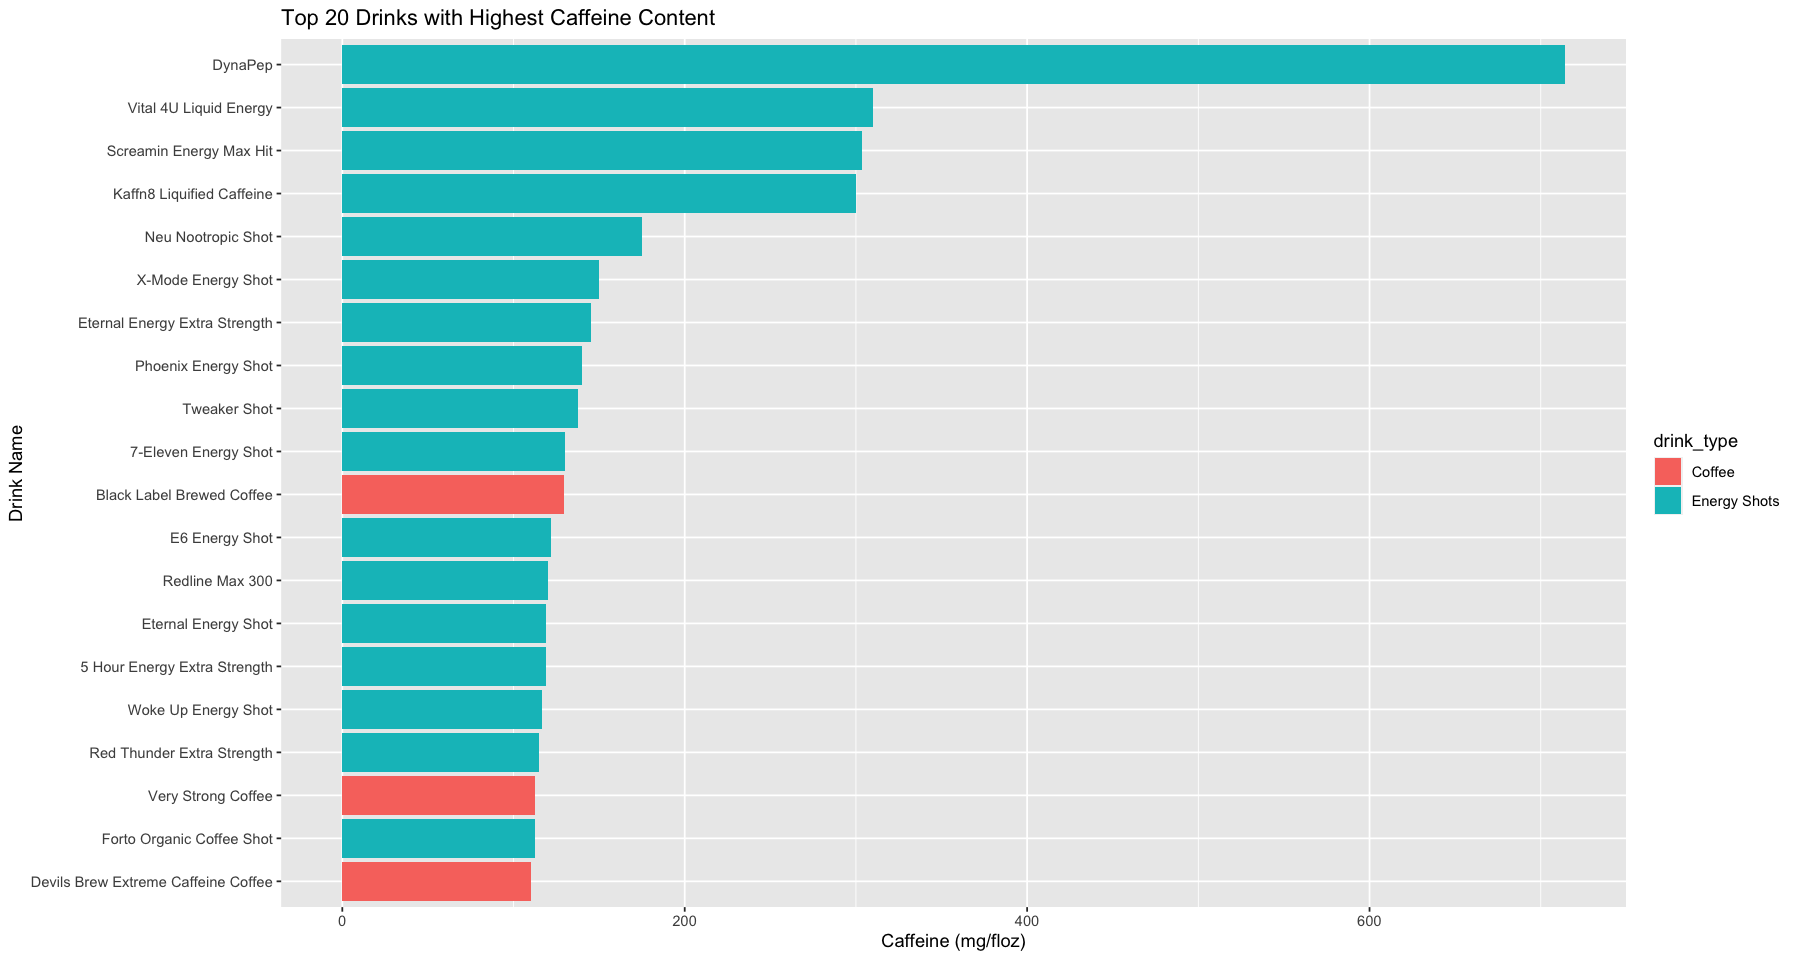

In [17]:
# Top 20 drinks with respect to caffeine
top5_caffeine <- df[order(df$caffeine_mg_per_floz, decreasing = TRUE), ][1:20, ]

# 5. Bar plot for top 20 drinks with respect to caffeine
ggplot(top5_caffeine, aes(x = reorder(drink_name, caffeine_mg_per_floz), y = caffeine_mg_per_floz, fill = drink_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 20 Drinks with Highest Caffeine Content",
       x = "Drink Name", y = "Caffeine (mg/floz)") +
  coord_flip()

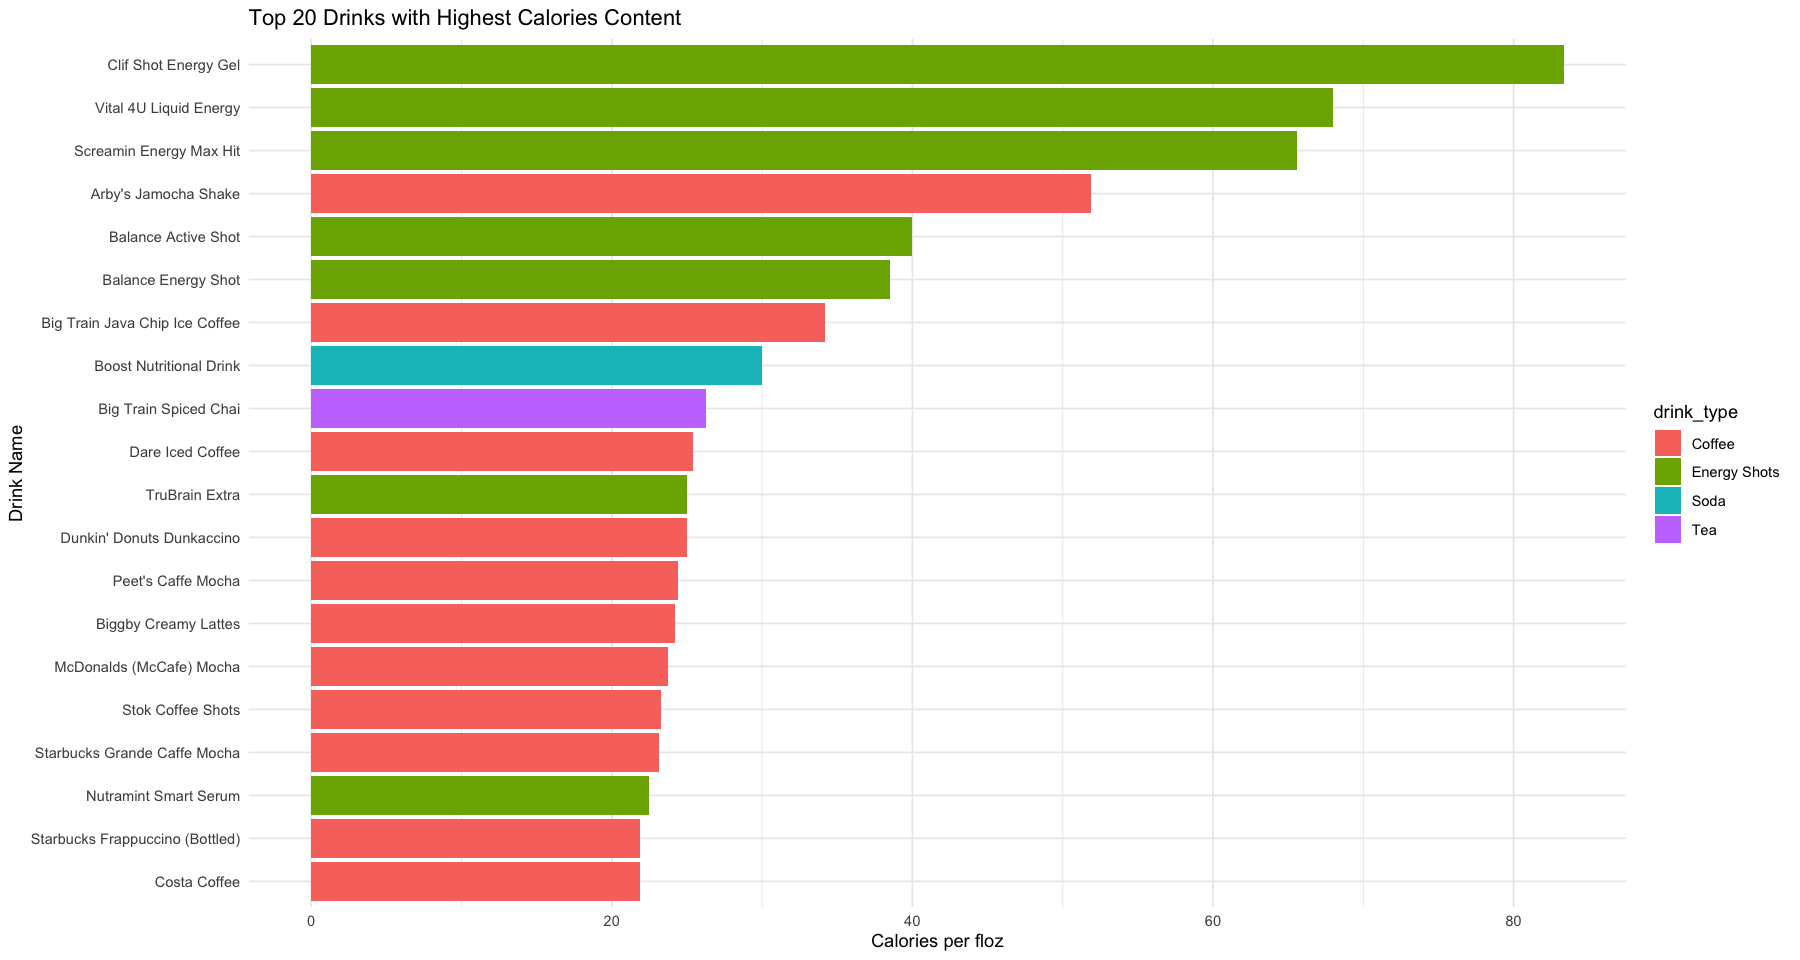

In [18]:
# Top 20 drinks with respect to calories
top5_calories <- df[order(df$calories_per_floz, decreasing = TRUE), ][1:20, ]

# 6. Bar plot for top 20 drinks with respect to calories
ggplot(top5_calories, aes(x = reorder(drink_name, calories_per_floz), y = calories_per_floz, fill = drink_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 20 Drinks with Highest Calories Content",
       x = "Drink Name", y = "Calories per floz") +
  theme_minimal() +
  coord_flip()

# Hypothesis Testing

In [19]:
install.packages("BSDA")
library(BSDA)


The downloaded binary packages are in
	/var/folders/gk/64vmdqys05vfzj3ywcq327z00000gn/T//RtmpJ0D2rr/downloaded_packages


Warning message:
“package ‘BSDA’ was built under R version 4.3.1”
Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange




### Function to calculate Z statistic:

In [20]:
zscore2 <- function(s1,s2){
    m1 <- mean(s1)
    m2 <- mean(s2)
    
    var1 <- var(s1)
    var2 <- var(s2)
    
    n <- length(s1)
    m <- length(s2)
    (m1 - m2)/sqrt(var1/n +var2/m)
}

# [COFFEE VS. ENERGY DRINKS: WHICH IS BETTER?](https://www.commonroomroasters.com/blogs/specialty-coffee/coffee-vs-energy-drinks#:~:text=Bottom%20line%3A%20coffee%20has%20a,eliminate%20the%20stimulation%20from%20caffeine.) website claims that:
1. Coffee contains more caffeine than an Energy Drink.
2. Coffee contains fewer calories than an Energy Drink

####  Lets test them!

# Test 1 - Upper tailed Two Sample test
#### Null Hypothesis (H0): There is no significant difference in caffeine content between coffee and an Energy Drink.

#### Alternative Hypothesis (H1): Coffee contains more caffeine than an Energy Drink.

#### We are fixing our significance level $\alpha$ = 5% = 0.05. We will reject our null hypothesis if P-Value is $\le$ 0.05.

In [21]:
coffee_caffeine <- df %>% filter(drink_type == 'Coffee') %>% pull(caffeine_mg_per_floz)
energy_drink_caffeine <- df %>% filter(drink_type == 'Energy Drink') %>% pull(caffeine_mg_per_floz)
summary(coffee_caffeine)
summary(energy_drink_caffeine)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.30    9.10   12.70   19.76   20.00  129.60 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     9.2    10.0    11.2    12.5    39.5 

In [22]:
length(coffee_caffeine)

[1] 173

In [23]:
length(energy_drink_caffeine)

[1] 237

#### Since the sample size is large(>30), it resembles normal distribution. So, Z-Test needs to be done to find out the significance value.

### Manual Test

In [24]:
z <- zscore2(coffee_caffeine, energy_drink_caffeine)
z

[1] 5.003117

In [25]:
p_value <- 1- pnorm(z)
p_value

[1] 2.820539e-07

### z.test from BSDA package

In [26]:
coffee_energy_drink_caffeine_result = z.test(x = coffee_caffeine, y = energy_drink_caffeine, alternative = 'greater', sigma.x = sd(coffee_caffeine), sigma.y = sd(energy_drink_caffeine))
coffee_energy_drink_caffeine_result


	Two-sample z-Test

data:  coffee_caffeine and energy_drink_caffeine
z = 5.0031, p-value = 2.821e-07
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 5.749063       NA
sample estimates:
mean of x mean of y 
 19.76069  11.19578 


In [27]:
coffee_energy_drink_caffeine_result$statistic

z 
5.003117

In [28]:
coffee_energy_drink_caffeine_result$p.value

[1] 2.820539e-07

#### There is strong evidence to reject null hypothesis as p-value < 0.05. So, we can conclude that Coffee contains more caffeine than an Energy Drink.

# Test 2 - Lower tailed Two Sample test
#### Null Hypothesis (H0): There is no significant difference in calorie count between coffee and an Energy Drink.

#### Alternative Hypothesis (H1): Coffee contains fewer calories than an Energy Drink.

#### We are fixing our significance level $\alpha$ = 5% = 0.05. We will reject our null hypothesis if P-Value is $\le$ 0.05.

In [29]:
coffee_calories <- df %>% filter(drink_type == 'Coffee') %>% pull(calories_per_floz)
energy_drink_calories <- df %>% filter(drink_type == 'Energy Drink') %>% pull(calories_per_floz)
summary(coffee_calories)
summary(energy_drink_calories)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.4546  5.8955 10.0000 51.8750 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.625   5.000   6.574  13.002  21.277 

In [30]:
length(coffee_calories)

[1] 173

In [31]:
length(energy_drink_calories)

[1] 237

#### Since the sample size is large(>30), it resembles normal distribution. So, Z-Test needs to be done to find out the significance value.

### Manual Test

In [32]:
z <- zscore2(coffee_calories, energy_drink_calories)
z

[1] -0.8800289

In [33]:
pnorm(z)

[1] 0.1894218

### z.test from BSDA package

In [34]:
coffee_energy_drink_calories_result = z.test(x = coffee_calories, y = energy_drink_calories, alternative = 'less', sigma.x = sd(coffee_calories), sigma.y = sd(energy_drink_calories))
coffee_energy_drink_calories_result


	Two-sample z-Test

data:  coffee_calories and energy_drink_calories
z = -0.88003, p-value = 0.1894
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
        NA 0.5899653
sample estimates:
mean of x mean of y 
 5.895494  6.574324 


In [35]:
coffee_energy_drink_calories_result$statistic

z 
-0.8800289

In [36]:
coffee_energy_drink_calories_result$p.value

[1] 0.1894218

#### There is no strong evidence to reject null hypothesis as p-value > 0.05

# Lets compare coffee with all other drinks

# Test 3 - Upper Tailed Two Sample test
#### Null Hypothesis (H0): There is no significant difference in caffeine content between coffee and other drinks.

#### Alternative Hypothesis (H1): Coffee contains more caffeine than other drinks.

#### We are fixing our significance level $\alpha$ = 5% = 0.05. We will reject our null hypothesis if P-Value is $\le$ 0.05.

In [37]:
coffee_caffeine <- df %>% filter(drink_type == 'Coffee') %>% pull(caffeine_mg_per_floz)
other_caffeine <- df %>% filter(drink_type != 'Coffee') %>% pull(caffeine_mg_per_floz)
summary(coffee_caffeine)
summary(other_caffeine)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.30    9.10   12.70   19.76   20.00  129.60 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    3.80    9.00   17.88   11.20  714.30 

In [38]:
length(coffee_caffeine)

[1] 173

In [39]:
length(other_caffeine)

[1] 459

#### Since the sample size is large(>30), it resembles normal distribution. So, Z-Test needs to be done to find out the significance value.

### Manual Test

In [40]:
z <- zscore2(coffee_caffeine, other_caffeine)
z

[1] 0.6771446

In [41]:
p_value <- 1- pnorm(z)
p_value

[1] 0.2491571

### z.test from BSDA package

In [42]:
coffee_caffeine_result = z.test(x = coffee_caffeine, y = other_caffeine, alternative = 'greater', sigma.x = sd(coffee_caffeine), sigma.y = sd(other_caffeine))
coffee_caffeine_result


	Two-sample z-Test

data:  coffee_caffeine and other_caffeine
z = 0.67714, p-value = 0.2492
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.689946        NA
sample estimates:
mean of x mean of y 
 19.76069  17.87843 


In [43]:
coffee_caffeine_result$statistic

z 
0.6771446

In [44]:
coffee_caffeine_result$p.value

[1] 0.2491571

#### There is no strong evidence to reject null hypothesis as p-value > 0.05

# Test 4 - Lower tailed Two Sample test
#### Null Hypothesis (H0): There is no significant difference in calorie content between coffee and other drinks.

#### Alternative Hypothesis (H1): Coffee contains fewer calories than other drinks.

#### We are fixing our significance level $\alpha$ = 5% = 0.05. We will reject our null hypothesis if P-Value is $\le$ 0.05.

In [45]:
coffee_calories <- df %>% filter(drink_type == 'Coffee') %>% pull(calories_per_floz)
other_calories <- df %>% filter(drink_type != 'Coffee') %>% pull(calories_per_floz)
summary(coffee_calories)
summary(other_calories)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.4546  5.8955 10.0000 51.8750 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   4.137   6.750  12.500  83.333 

In [46]:
length(coffee_calories)

[1] 173

In [47]:
length(other_calories)

[1] 459

#### Since the sample size is large(>30), it resembles normal distribution. So, Z-Test needs to be done to find out the significance value.

### Manual test

In [48]:
z <- zscore2(coffee_calories, other_calories)
z

[1] -1.104954

In [49]:
pnorm(z)

[1] 0.1345898

### z.test from BSDA package

In [50]:
coffee_calories_result = z.test(x = coffee_calories, y = other_calories, alternative = 'less', sigma.x = sd(coffee_calories), sigma.y = sd(other_calories))
coffee_calories_result


	Two-sample z-Test

data:  coffee_calories and other_calories
z = -1.105, p-value = 0.1346
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
        NA 0.4173456
sample estimates:
mean of x mean of y 
 5.895494  6.749629 


In [51]:
coffee_calories_result$statistic

z 
-1.104954

In [52]:
coffee_calories_result$p.value

[1] 0.1345898

#### There is no strong evidence to reject null hypothesis as p-value > 0.05